In [1]:
help(attitude)

In [2]:
# Sumario dos dados
summary(attitude)

     rating        complaints     privileges       learning         raises     
 Min.   :40.00   Min.   :37.0   Min.   :30.00   Min.   :34.00   Min.   :43.00  
 1st Qu.:58.75   1st Qu.:58.5   1st Qu.:45.00   1st Qu.:47.00   1st Qu.:58.25  
 Median :65.50   Median :65.0   Median :51.50   Median :56.50   Median :63.50  
 Mean   :64.63   Mean   :66.6   Mean   :53.13   Mean   :56.37   Mean   :64.63  
 3rd Qu.:71.75   3rd Qu.:77.0   3rd Qu.:62.50   3rd Qu.:66.75   3rd Qu.:71.00  
 Max.   :85.00   Max.   :90.0   Max.   :83.00   Max.   :75.00   Max.   :88.00  
    critical        advance     
 Min.   :49.00   Min.   :25.00  
 1st Qu.:69.25   1st Qu.:35.00  
 Median :77.50   Median :41.00  
 Mean   :74.77   Mean   :42.93  
 3rd Qu.:80.00   3rd Qu.:47.75  
 Max.   :92.00   Max.   :72.00  

In [3]:
# Subset the attitude data
dat = attitude[,c(3,4)]

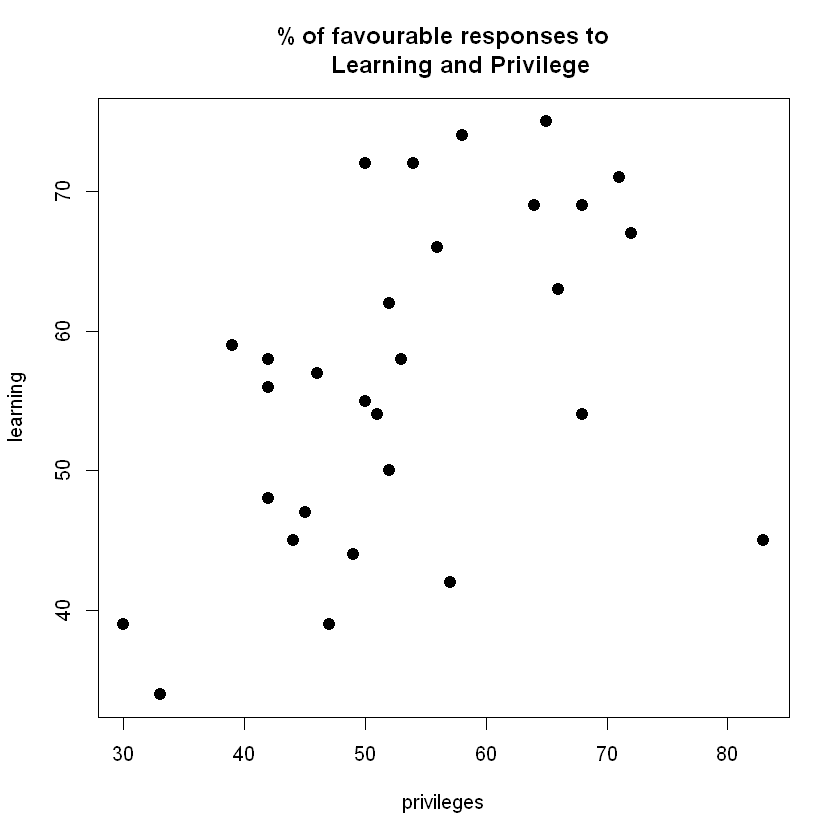

In [4]:
# Plot subset data
plot(dat, main = "% of favourable responses to
     Learning and Privilege", pch =20, cex =2)
# Perform K-Means with 2 clusters
set.seed(7)
km1 = kmeans(dat, 2, nstart=100)

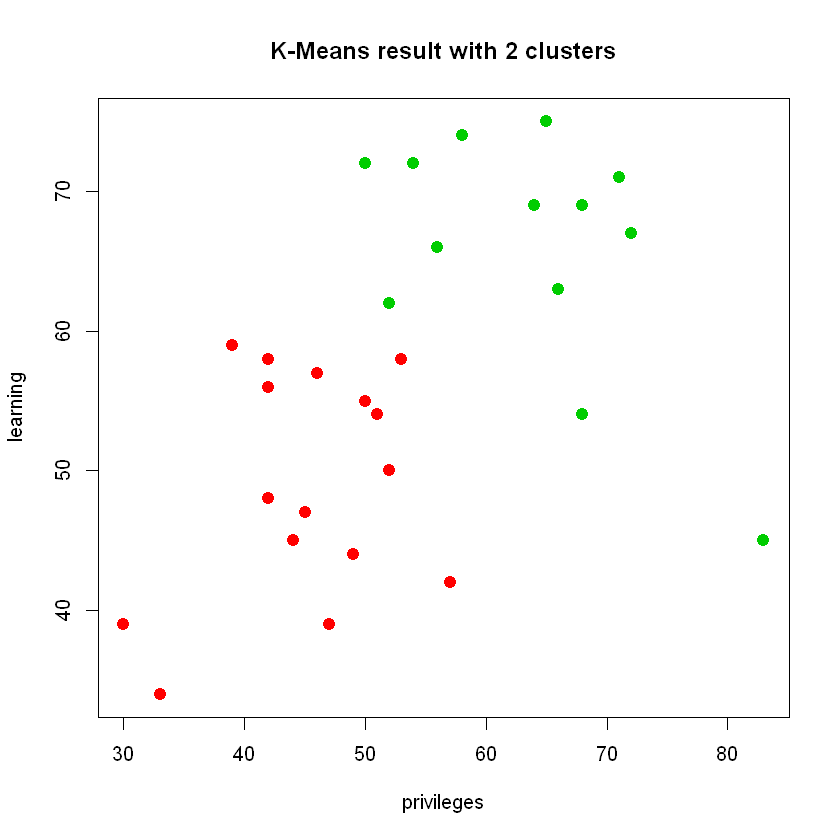

In [5]:
# Plot results
plot(dat, col =(km1$cluster +1) , main="K-Means result with 2 clusters", 
     pch=20, cex=2)

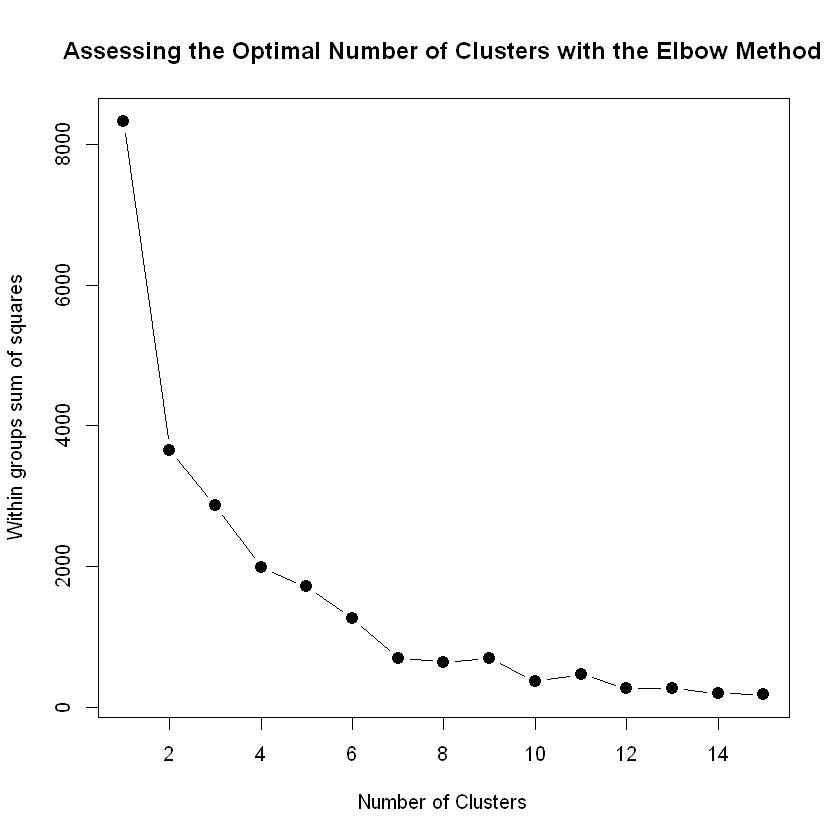

In [6]:
mydata <- dat
wss <- (nrow(mydata)-1)*sum(apply(mydata,2,var))
for (i in 2:15) wss[i] <- sum(kmeans(mydata,
                                     centers=i)$withinss)
plot(1:15, wss, type="b", xlab="Number of Clusters",
     ylab="Within groups sum of squares",
     main="Assessing the Optimal Number of Clusters with the Elbow Method",
     pch=20, cex=2)

In [7]:
#Perform K-Means with the optimal number of clusters 
#identified from the Elbow method
set.seed(7)
km2 = kmeans(dat, 6, nstart=100)

In [8]:
# Examine the result of the clustering algorithm
km2

K-means clustering with 6 clusters of sizes 4, 2, 2, 8, 6, 8

Cluster means:
  privileges learning
1   54.50000   71.000
2   75.50000   49.500
3   31.50000   36.500
4   46.87500   57.375
5   67.66667   69.000
6   47.62500   45.250

Clustering vector:
 [1] 3 4 5 6 1 6 4 4 5 6 4 6 6 2 1 1 5 5 4 2 3 4 6 4 6 5 1 6 5 4

Within cluster sum of squares by cluster:
[1]  71.0000 153.0000  17.0000 244.7500 133.3333 255.3750
 (between_SS / total_SS =  89.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

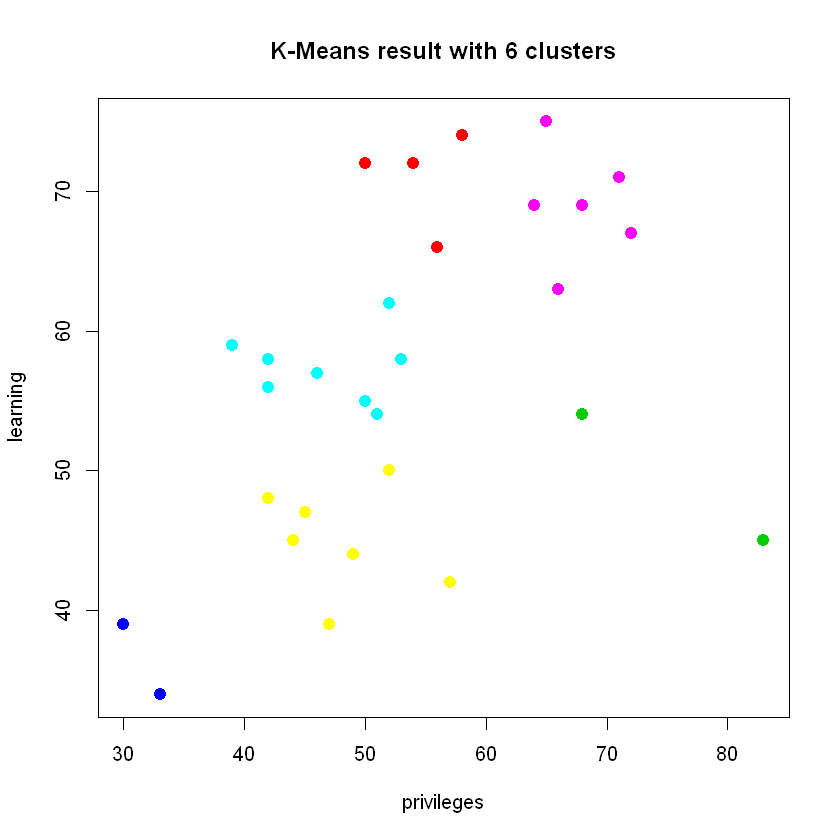

In [9]:
# Plot results
plot(dat, col =(km2$cluster +1) , 
     main="K-Means result with 6 clusters", pch=20, cex=2)

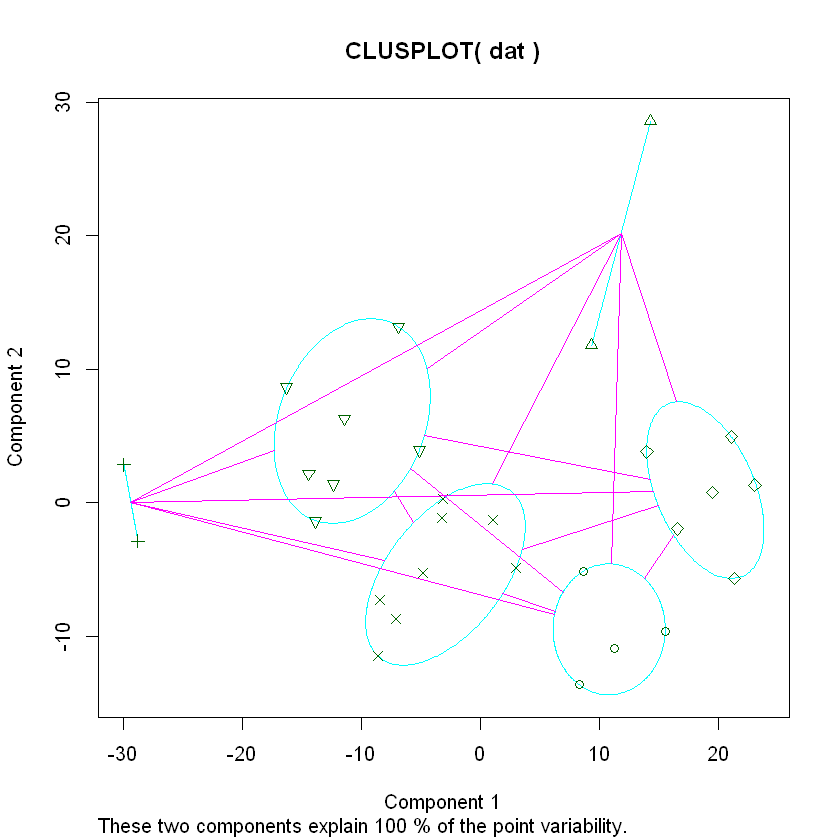

In [10]:
library(cluster)
clusplot(dat, km2$cluster)